# Differentially Private Top-$k$ selection

This notebook is part of the supplementary material for the following paper:
- **Title**: "Differentially Private Top-$k$ Selection via Stability on Unknown Domain"
- **Authors**: Ricardo Silva Carvalho, Ke Wang, Lovedeep Gondara, Miao Chun Yan
- **Venue**: 36th Conference on Uncertainty in Artificial Intelligence (UAI), 2020
- **URL**: To be added.

For contact, feel free to reach out to "ricardosc" at gmail dot com, or via [personal website](https://ricardocarvalhods.github.io/).

---

### Overview
- **Goal**: Perform differentially private top-k selection of most visited venues for dataset with locations of users.
- Private task selects locations/venues **without** compromising the privacy of users.
- We test different settings of differential privacy parameters $\varepsilon$ and $\delta$.
- We focus on unknown domain, i.e. we don't need info about complete domain and don't use any structural property from it.
- Mainly our algorithm Top Stable (TS) uses stability, plus other techniques, to select elements, only looking at the top-$\bar{k}$ for a given $\bar{k} \geq k$.
- TS is compared with Limited Domain (LD) from [David Durfee and Ryan Rogers, NeurIPS 2019](https://arxiv.org/pdf/1905.04273.pdf) that also works on unknown domain.

---

### Dataset
- Below we reproduce the results showed on the paper for:
  - Dataset: **Gowalla**, publicly available at https://snap.stanford.edu/data/loc-gowalla.html.
  - Gowalla is a location-based social networking website where users share their locations by checking-in.
  - Reference: E. Cho, S. A. Myers, J. Leskovec. Friendship and Mobility: Friendship and Mobility: User Movement in Location-Based Social Networks ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD), 2011.

---

## Data loading and preprocessing

**NOTE**:
- Please download `loc-gowalla_totalCheckins.txt.gz` from https://snap.stanford.edu/data/loc-gowalla.html and include it on the `datasets` folder.
- We could not include it on github, as the file is slightly larger than github's maximum file limit size.

In [1]:
import gzip
import pandas as pd

data_dir = "./datasets/"

with gzip.open(data_dir + "loc-gowalla_totalCheckins.txt.gz") as f:
    df = pd.read_csv(f, sep='\t', header=None)

df.columns = ['userid','timestamp','latitude','longitude','spotid']
df = df.drop(['timestamp','latitude','longitude'], axis=1)
df['val'] = 1
df.drop_duplicates(inplace=True) 

nr_users = df['userid'].nunique()
df = df.groupby(['spotid'], as_index=False)['val'].sum()

usr_counts = df['val'].values
usr_counts = usr_counts.astype('int32')
usr_counts = usr_counts[usr_counts.argsort()[::-1]]

## Experimental Evaluation

In [2]:
import sys
sys.path.append("./src/")

from experiment import run_experiment

### Tabulated results for Gowalla dataset

In [3]:
# Settings
delta = 1/nr_users

nr_trials = 2000
eps_list = [0.4, 0.8, 1.0]
k_list = [3, 10, 50]

In [4]:
run_experiment(usr_counts, eps_list, k_list, delta, nr_trials)


- epsilon =  0.4

k = 3
TS = P: 0.973 | S: 0.975
LD = P: 0.852 | S: 0.866

k = 10
TS = P: 1.000 | S: 1.000
LD = P: 0.782 | S: 0.823

k = 50
TS = P: 0.203 | S: 0.385
LD = P: 0.240 | S: 0.431

- epsilon =  0.8

k = 3
TS = P: 1.000 | S: 1.000
LD = P: 1.000 | S: 1.000

k = 10
TS = P: 1.000 | S: 1.000
LD = P: 0.898 | S: 0.921

k = 50
TS = P: 0.401 | S: 0.591
LD = P: 0.388 | S: 0.581

- epsilon =  1.0

k = 3
TS = P: 1.000 | S: 1.000
LD = P: 1.000 | S: 1.000

k = 10
TS = P: 1.000 | S: 1.000
LD = P: 0.901 | S: 0.923

k = 50
TS = P: 0.444 | S: 0.631
LD = P: 0.453 | S: 0.639


### Reproduction of Figure 1a:  Gowalla dataset, TS better than LD on "stable range"

In [5]:
nr_trials = 2000
eps_list = [0.8]
k_list = list(range(1,101))

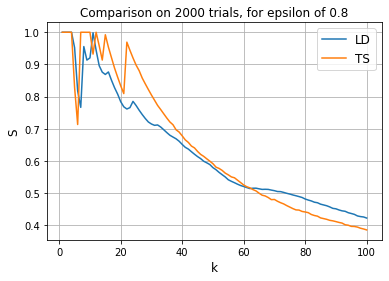

In [6]:
run_experiment(usr_counts, eps_list, k_list, delta, nr_trials, verbose=False, show_plot=True)